In [2]:
import ROOT


ERAS = ['A', 'C', 'D', 'E', 'F']
chain = ROOT.TChain("JpsiDstar")

for i in ERAS:
     save_path = "/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/" 
     dataset = "Charmonium2017" + i
     print(save_path + dataset + "_JpsiDstar.root")
     chain.Add(save_path + dataset + "_JpsiDstar.root")

/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/Charmonium2017A_JpsiDstar.root
/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/Charmonium2017C_JpsiDstar.root
/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/Charmonium2017D_JpsiDstar.root
/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/Charmonium2017E_JpsiDstar.root
/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/OniaOpenCharmRun2ULAna/fit/Data_to_fit/Charmonium2017F_JpsiDstar.root


In [9]:
dstar_mass = chain.AsMatrix(["dstar_mass"])
jpsi_mass = chain.AsMatrix(["jpsi_mass"])

In [11]:
hist = ROOT.TH2D('h1', 'Associated Particles; ;; ', 20, 2.95, 3.25, 20, 0.14, 0.16)
chain.Draw("dstar_mass:jpsi_mass>>h1")

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Info in <TCanvas::Print>: png file jpsiDstar.png has been created


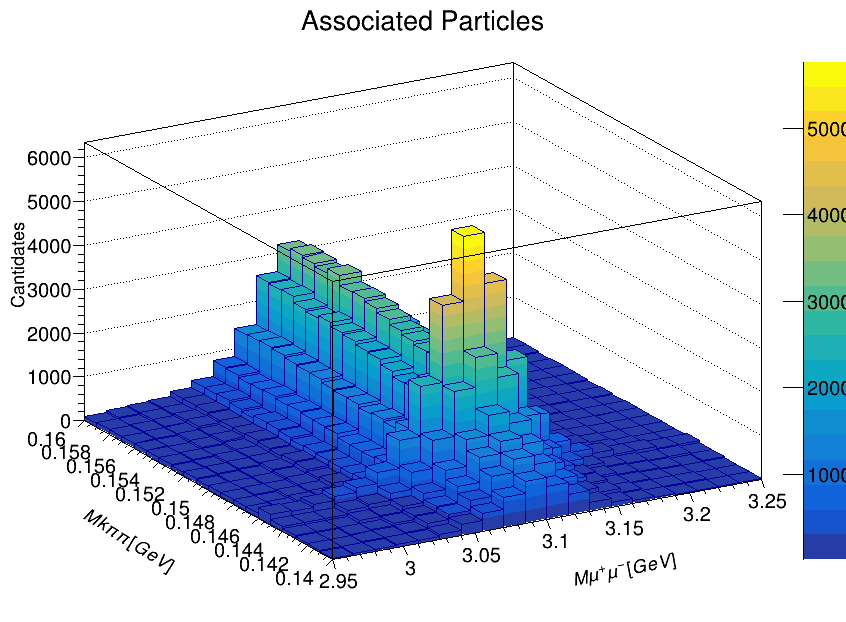

In [12]:
# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)
can.Draw()

hist.SetStats(False)
hist.Draw("lego2z")

# Jpsi axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(11)
mumu.DrawLatex(.8,0.09, "M\mu^+\mu^- [GeV]")

# D* axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(-32)
mumu.DrawLatex(0.2,0.08, "Mk\pi\pi [GeV]")

# Candidates
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(90)
mumu.DrawLatex(0.03,0.65, "Cantidates")

ROOT.gPad.Update()

PaletteAxis = hist.GetListOfFunctions().FindObject("palette")
PaletteAxis.SetX1NDC(1.4)
PaletteAxis.SetX2NDC(0.95)


can.Update()
can.SaveAs("jpsiDstar.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: png file psiDstar.png has been created


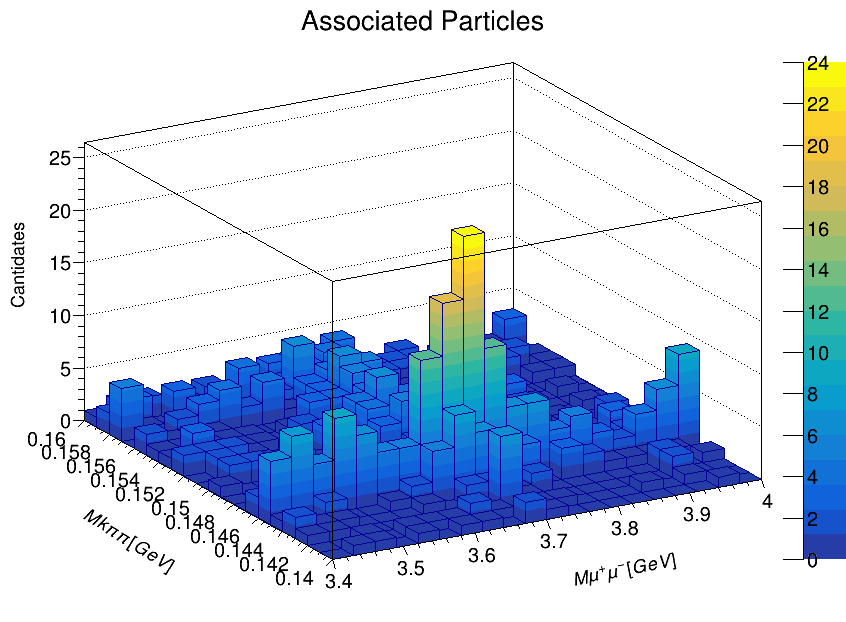

In [4]:
import ROOT

# Psi + Dstar
file = ROOT.TFile.Open("../output/Charmonium2018B_test/DstarPsi_asso_charmonium_2018B.root")
tree = file.Get('asso')

dstar_mass = tree.AsMatrix(["dstar_mass"])
jpsi_mass = tree.AsMatrix(["psi_mass"])

hist = ROOT.TH2D('h1', 'Associated Particles; ;; ', 20, 3.40, 4.00, 20, 0.14, 0.16)
tree.Draw("dstar_mass:psi_mass>>h1")

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)
can.Draw()

hist.SetStats(False)
hist.Draw("lego2z")

# Psi axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(11)
mumu.DrawLatex(.8,0.09, "M\mu^+\mu^- [GeV]")

# D* axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(-32)
mumu.DrawLatex(0.2,0.08, "Mk\pi\pi [GeV]")

# Candidates
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(90)
mumu.DrawLatex(0.03,0.65, "Cantidates")

ROOT.gPad.Update()

PaletteAxis = hist.GetListOfFunctions().FindObject("palette")
PaletteAxis.SetX1NDC(1.4)
PaletteAxis.SetX2NDC(0.95)


can.Update()
can.SaveAs("psiDstar.png")

In [3]:
## Upsilon roxeda
file = '/eos/user/k/kmotaama/MuOniaRun17E/MuOniaRun17E.coffea'

acc = load(file)

In [4]:
##################### Association - Y and D* #####################

# Dstar
all_asso_dstar = acc['DimuDstar']['Dstar']['deltamr'].value

# Upsilon
all_asso_ups = acc['DimuDstar']['Dimu']['mass'].value

with uproot3.recreate("../output/Charmonium2018B_test/DstarUps_asso_MuOnia_2017B.root") as ds:
    ds['asso'] = uproot3.newtree({"dstar_mass": "float32", "ups_mass": "float32"})
    ds['asso'].extend({"dstar_mass": all_asso_dstar, "ups_mass": all_asso_ups})

In [1]:
import ROOT

file = ROOT.TFile.Open("../output/Charmonium2018B_test/DstarUps_asso_MuOnia_2017B.root")
tree = file.Get('asso')

dstar_mass = tree.AsMatrix(["dstar_mass"])
jpsi_mass = tree.AsMatrix(["ups_mass"])

Welcome to JupyROOT 6.16/00


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: png file upsDstar.png has been created


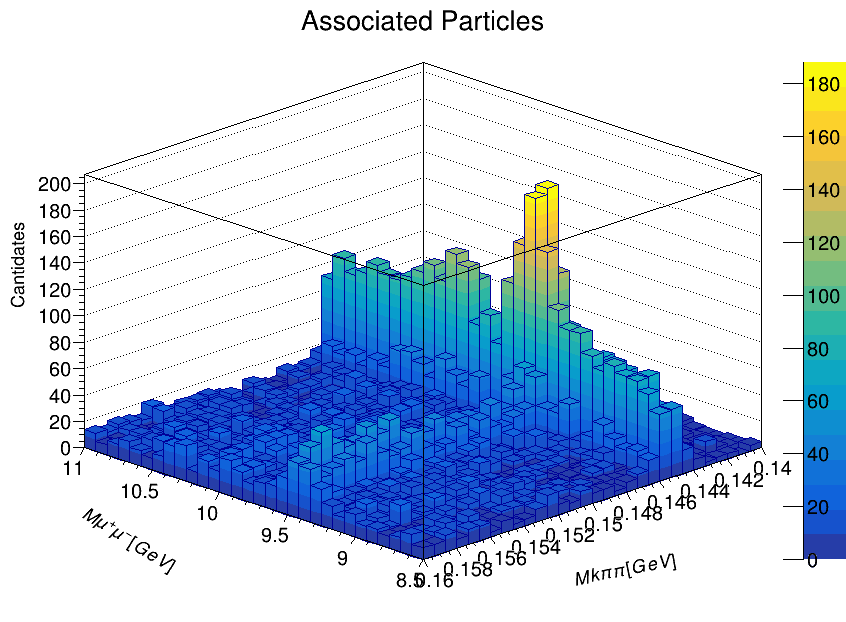

In [8]:
hist = ROOT.TH2D('h1', 'Associated Particles; ;; ', 30, 8.5, 11.0, 30, 0.14, 0.16)
tree.Draw("dstar_mass:ups_mass>>h1")

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)
can.Draw()

hist.SetStats(False)
hist.Draw("lego2z")

# Jpsi axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(11)
mumu.DrawLatex(.8,0.09, "Mk\pi\pi [GeV]" )

# D* axis
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(-32)
mumu.DrawLatex(0.2,0.08, "M\mu^+\mu^- [GeV]"
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              )

# Candidates
mumu = ROOT.TLatex()
mumu.SetNDC()
mumu.SetTextFont(43)
mumu.SetTextSize(20)
mumu.SetTextAlign(31)
mumu.SetTextAngle(90)
mumu.DrawLatex(0.03,0.65, "Cantidates")

ROOT.gPad.Update()

PaletteAxis = hist.GetListOfFunctions().FindObject("palette")
PaletteAxis.SetX1NDC(1.4)
PaletteAxis.SetX2NDC(0.95)

ROOT.gPad.SetPhi(135)
ROOT.gPad.Update()

can.Update()
can.SaveAs("upsDstar.png")